# Traffic sign detection
The goal of this project is to classify 20 different types of Traffic sign commonly used around the world. The types are following: <br/>
1. Regulatory Signs
2. Warning Signs
3. Informational Signs
4. Construction Signs
5. School Zone Signs
6. Regulatory Signs for Bicycles
7. Railroad Signs
8. Pedestrian Signs
9. Motorway Signs
10. Speed Limit Signs
11. Priority Signs
12. Lane Control Signs
13. Destination Signs
14. Roundabout Signs
15. Parking Signs
16. Hospital Signs
17. Tourist Information Signs
18. No Left Turn Signs
19. No Right Turn Signs
20. No Passing Zone Signs
21. Road Narrows Signs
22. Yield Signs
23. Low Clearance Signs
24. Traffic Signal Ahead Signs
25. Detour Signs

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install fastbook


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.1 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/various model/traffic_sign

In [ ]:
traffic_sign_label=["Regulatory Signs",
"Warning Signs",
"Informational Signs",
"Construction Signs",
"School Zone Signs",
"Regulatory Signs for Bicycles",
"Railroad Signs",
"Pedestrian Signs",
"Motorway Signs",
"Speed Limit Signs",
"Priority Signs",
"Lane Control Signs",
"Destination Signs",
"Roundabout Signs",
"Parking Signs",
"Hospital Signs",
"Tourist Information Signs",
"No Left Turn Signs",
"No Right Turn Signs",
"No Passing Zone Signs",
"Road Narrows Signs",
"Yield Signs",
"Low Clearance Signs",
"Traffic Signal Ahead Signs",
"Detour Signs"]
len(traffic_sign_label)

In [ ]:
images = search_images_ddg(traffic_sign_label[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

In [ ]:
data_path = "traffic_sign_data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for traffic_sign_type in traffic_sign_label:

  dest = f"{data_path}/{traffic_sign_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    traffic_image_urls = search_images_ddg(traffic_sign_type)
    download_images(dest, urls = traffic_image_urls)

  except:
    continue

In [ ]:
data_path = "traffic_sign_data"

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#9322) [Path('traffic_sign_data/Warning Signs/98629f02-35c1-45ed-909d-935228823aad.png'),Path('traffic_sign_data/Warning Signs/437eaed9-4097-4587-9580-6bd693f7b5e3.jpg'),Path('traffic_sign_data/Warning Signs/d164774f-ff08-480f-a041-b39b7a837527.png'),Path('traffic_sign_data/Warning Signs/b24591e8-1fbb-4d5e-a335-aa316df8798b.png'),Path('traffic_sign_data/Warning Signs/d108a835-0559-45c1-a0d3-209d3637a824.jpg'),Path('traffic_sign_data/Warning Signs/c11e1c5d-9690-4715-b74f-55d31a509046.jpg'),Path('traffic_sign_data/Warning Signs/e8422ae9-1583-4db3-966f-5bffcc143ca1.png'),Path('traffic_sign_data/Warning Signs/a34d535c-3e42-4378-a020-3f0a8d710415.png'),Path('traffic_sign_data/Warning Signs/ba29869c-8384-4e10-bc55-320909fac32f.gif'),Path('traffic_sign_data/Warning Signs/a11a47b8-2551-4461-9668-2e03029d7a3e.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#276) [Path('traffic_sign_data/Warning Signs/e430fa50-f5e6-4281-9b84-d02d39d72c48.jpg'),Path('traffic_sign_data/Warning Signs/0b22c2cf-42e8-4a88-8cb0-1c320b4d14e2.jpg'),Path('traffic_sign_data/Warning Signs/fe9e7d9a-c034-46cb-a014-7a2d204a61c8.svg'),Path('traffic_sign_data/Warning Signs/8045295f-9f0a-466b-8aec-c43aabc6c67f.svg'),Path('traffic_sign_data/Warning Signs/0f4e20a4-a078-4008-a827-9f58bff04d91.svg'),Path('traffic_sign_data/Warning Signs/e126c42f-ee96-497b-b56e-6b556fa898a5.jpg'),Path('traffic_sign_data/Warning Signs/c598c169-f7c6-4e34-8314-e2e37bbb8dca.jpg'),Path('traffic_sign_data/Warning Signs/4dedc469-5eb8-4960-8aa4-e6cc414f9850.svg'),Path('traffic_sign_data/Warning Signs/afc44465-42f4-495c-82ac-75ba399b2928.svg'),Path('traffic_sign_data/Warning Signs/481f7556-8fe9-413b-b83c-27c265a12209.svg')...]

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.15, seed=10),
    get_y=parent_label,
    item_tfms=Resize(128))

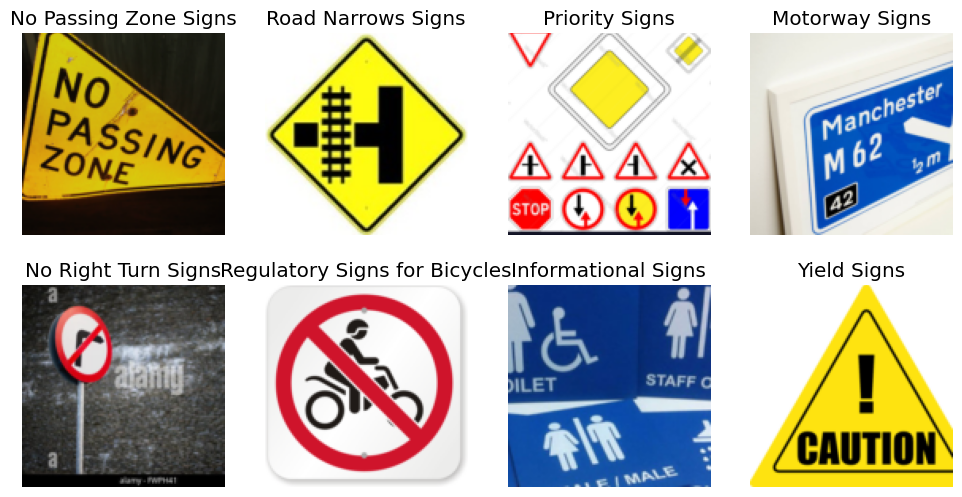

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

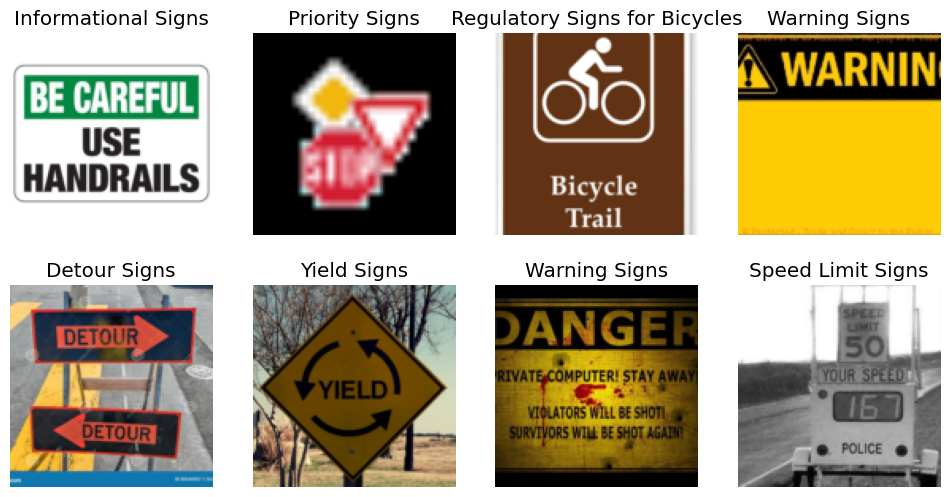

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

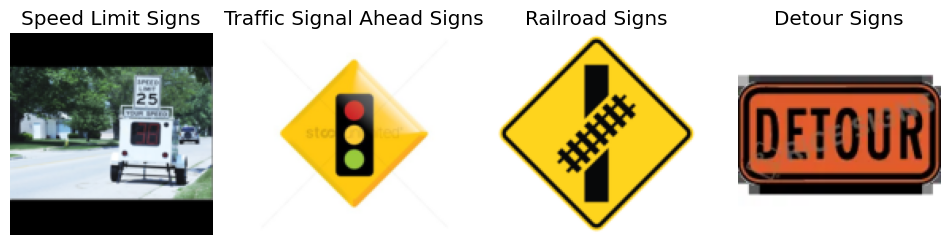

In [ ]:

  dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
  dls = dblock.dataloaders(data_path)
  dls.valid.show_batch(max_n=4, nrows=1)


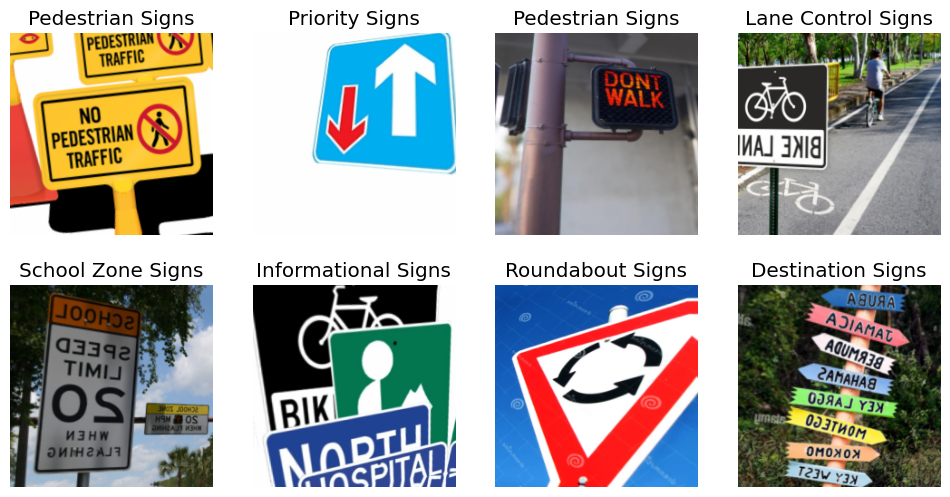

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)
torch.save(dls, "traffic_dataloader1_v0.pkl")
